# PM2.5回帖网络

In [15]:
import urllib2
from bs4 import BeautifulSoup
%matplotlib inline
import matplotlib.pyplot as plt

# 1. 读取数据
***
## 1.1 把PM2.5的TXT发帖数据，作者和回帖数据按列命名

In [16]:
import pandas as pd
df=pd.read_csv('/Users/dingcong/Desktop/pm2.5/tianyapm.txt', sep = "\t", header=None)
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:193]

,title,link,author,author_page,click,reply,time
0,严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图),/post-free-5305449-1.shtml,静静的莲花,http://www.tianya.cn/105514428,31056,175,2015-11-09 14:17
1,"【连活着都是奢侈】,台湾去年死于PM2.5高达六千多人.",/post-free-5345549-1.shtml,四號,http://www.tianya.cn/8240809,28564,82,2015-12-26 10:46
2,",【老虎画画】帝都PM2.5,需要配合的谎言",/post-free-3011875-1.shtml,唐伯虎瞎画画,http://www.tianya.cn/43393067,11504,99,2013-01-13 17:20
3,青岛李沧爱尔城运动工厂--可过滤PM2.5体育场馆,/post-free-4835068-1.shtml,眼镜兔er,http://www.tianya.cn/97272912,8374,23,2014-12-13 10:23
4,骆家辉让中国人知道什么是PM2.5,/post-free-3825633-1.shtml,没有救世主007,http://www.tianya.cn/65737926,7403,11,2013-11-21 11:26
5,你今天又吸入了多少PM2.5?(转载),/post-free-4524650-1.shtml,cypress0818,http://www.tianya.cn/79828445,6562,21,2014-07-30 22:32
6,"雾霾天无聊做了个实测室内PM2.5,有木有人来围观结果",/post-free-3856677-1.shtml,aileencyh,http://www.tianya.cn/72141286,6033,154,2013-12-03 11:57
7,哪个品牌的pm2.5口罩能真正防pm2.5?,/post-free-3783861-1.shtml,初秋絮语123,http://www.tianya.cn/84866276,5193,2,2013-11-04 10:57
8,PM2.5又爆表 还是在家骑自行车吧,/post-free-3802295-1.shtml,dgrg5t4h,http://www.tianya.cn/41225348,2381,7,2013-11-11 15:03
9,霾汰人的PM2.5,/post-free-3794862-1.shtml,天海原住民,http://www.tianya.cn/84967699,1823,237,2013-11-08 09:42


In [17]:
da = pd.read_csv('/Users/dingcong/Desktop/pm2.5/tianyapmauthor.txt', sep = "\t", header=None)
da=da.rename(columns = {0:'url', 1:'followed', 2:'fans',3:'post', 4:'reply'})
da[:193]

,url,followed,fans,post,reply
0,http://www.tianya.cn/105514428,11,71,34,329
1,http://www.tianya.cn/8240809,14,10248,10161,16293
2,http://www.tianya.cn/43393067,477,52353,2739,3348
3,http://www.tianya.cn/97272912,16,4,19,21
4,http://www.tianya.cn/65737926,3,63,973,2195
5,http://www.tianya.cn/79828445,0,3,6,5
6,http://www.tianya.cn/72141286,0,2,1,50
7,http://www.tianya.cn/84866276,0,1,12,0
8,http://www.tianya.cn/41225348,16,4,22,9
9,http://www.tianya.cn/84967699,0,1,1,6


In [18]:
dtt = []
with open('/Users/dingcong/Desktop/pm2.5/tianya_formal_network.txt', 'r') as f:
    for line in f:
        pnum, link, time, author_id, author, content = line.replace('\n', '').split('\t')
        dtt.append([pnum, link, time, author_id, author, content])
len(dtt)

1171

In [19]:
dt = pd.DataFrame(dtt)
dt=dt.rename(columns = {0:'page_num', 1:'link', 2:'time', 3:'author',4:'author_name', 5:'reply'})
dt[:5]

,page_num,link,time,author,author_name,reply
0,1,/post-free-5305449-1.shtml,2015-11-09 14:17:00,105514428,静静的莲花,供暖季开始一周后，东 北多地迎来持续的六级严重污染天气。11月8日，沈阳PM2.5浓度爆表...
1,1,/post-free-5305449-1.shtml,2015-11-09 14:18:09,105514428,静静的莲花,
2,1,/post-free-5305449-1.shtml,2015-11-09 14:21:26,105514428,静静的莲花,加强空气治理，保证人民身体健康！
3,1,/post-free-5305449-1.shtml,2015-11-09 14:25:29,105514428,静静的莲花,@静静的莲花 1楼 2015-11-09 14:18:00 ———————————...
4,1,/post-free-5305449-1.shtml,2015-11-09 15:07:00,70416291,老婆叫我来巡山,要PM2.5 还是要供暖？哎


## 1.2 获取时间数据

In [20]:
# extract date from datetime
date = map(lambda x: x[:10], dt.time)
dt['date'] = pd.to_datetime(date)

## 1.3 主贴和回帖混杂，找出主贴author

In [21]:
dt[:10]

,page_num,link,time,author,author_name,reply,date
0,1,/post-free-5305449-1.shtml,2015-11-09 14:17:00,105514428,静静的莲花,供暖季开始一周后，东 北多地迎来持续的六级严重污染天气。11月8日，沈阳PM2.5浓度爆表...,2015-11-09
1,1,/post-free-5305449-1.shtml,2015-11-09 14:18:09,105514428,静静的莲花,,2015-11-09
2,1,/post-free-5305449-1.shtml,2015-11-09 14:21:26,105514428,静静的莲花,加强空气治理，保证人民身体健康！,2015-11-09
3,1,/post-free-5305449-1.shtml,2015-11-09 14:25:29,105514428,静静的莲花,@静静的莲花 1楼 2015-11-09 14:18:00 ———————————...,2015-11-09
4,1,/post-free-5305449-1.shtml,2015-11-09 15:07:00,70416291,老婆叫我来巡山,要PM2.5 还是要供暖？哎,2015-11-09
5,1,/post-free-5305449-1.shtml,2015-11-09 15:24:58,84439330,临安小股民,好吓人 。。。。。。,2015-11-09
6,1,/post-free-5305449-1.shtml,2015-11-09 15:27:42,103878836,icewindx2015,饺子王很亮。。,2015-11-09
7,1,/post-free-5305449-1.shtml,2015-11-09 15:28:43,50486279,草苞,吓人啊！吓人哪!,2015-11-09
8,1,/post-free-5305449-1.shtml,2015-11-09 15:28:59,74063507,jqg00,印象中的东北不是山清水秀的吗，怎么也污染这么严重,2015-11-09
9,1,/post-free-5305449-1.shtml,2015-11-09 15:33:23,46543352,小白兔vs小灰兔,好可怕,2015-11-09


## 1.4 获取回帖者数量USER数据

In [22]:
from collections import defaultdict 
link_user_dict = defaultdict(list)
for i in range(len(dt)):
    link_user_dict[dt.link[i]].append(dt.author[i])

In [23]:
df['user'] = [len(link_user_dict[l]) for l in df.link]
df[:2]

,title,link,author,author_page,click,reply,time,user
0,严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图),/post-free-5305449-1.shtml,静静的莲花,http://www.tianya.cn/105514428,31056,175,2015-11-09 14:17,166
1,"【连活着都是奢侈】,台湾去年死于PM2.5高达六千多人.",/post-free-5345549-1.shtml,四號,http://www.tianya.cn/8240809,28564,82,2015-12-26 10:46,56


# 2. 数据分析
***
## 2.1 分析USER和REPLY的线性回归关系

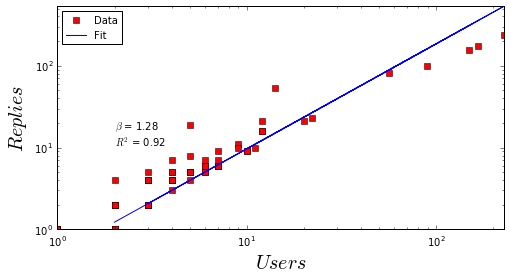

In [36]:
import statsmodels.api as sm
import numpy as np

x = np.log(df.user+1)
y = np.log(df.reply+1)
xx = sm.add_constant(x, prepend=True)
res = sm.OLS(y,xx).fit()
constant,beta = res.params
r2 = res.rsquared

fig = plt.figure(figsize=(8, 4),facecolor='white')
plt.plot(df.user, df.reply, 'rs', label= 'Data')
plt.plot(np.exp(x), np.exp(constant + x*beta),"-", label = 'Fit')
plt.yscale('log');plt.xscale('log')
plt.xlabel(r'$Users$', fontsize = 20)
plt.ylabel(r'$Replies$', fontsize = 20)
plt.text(max(df.user)/100,max(df.reply)/20,
         r'$\beta$ = ' + str(round(beta,2)) +'\n' + r'$R^2$ = ' + str(round(r2, 2)))
plt.legend(loc=2,fontsize=10, numpoints=1)
plt.axis('tight')
plt.show()

In [26]:
x = np.log(df.user+1)
y = np.log(df.reply+1)
xx = sm.add_constant(x, prepend=True)
res = sm.OLS(y,xx).fit()
constant,beta = res.params
r2 = res.rsquared
print constant, beta, r2

-0.683908524713 1.28349312228 0.919860531418


## 2.2 分析USER和CLICK的线性回归关系

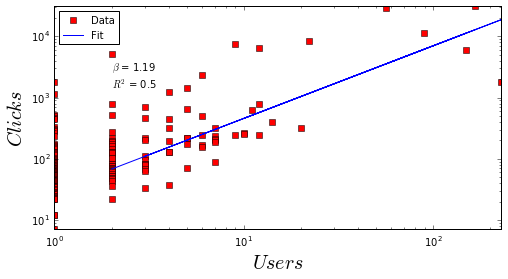

In [46]:
x = np.log(df.user+1)
y = np.log(df.click+1)
xx = sm.add_constant(x, prepend=True)
res = sm.OLS(y,xx).fit()
constant,beta = res.params
r2 = res.rsquared
fig = plt.figure(figsize=(8, 4),facecolor='white')
plt.plot(df.user, df.click, 'rs', label= 'Data')
plt.plot(np.exp(x), np.exp(constant + x*beta),"-", label = 'Fit')
plt.yscale('log');plt.xscale('log')
plt.xlabel(r'$Users$', fontsize = 20)
plt.ylabel(r'$Clicks$', fontsize = 20)
plt.text(max(df.user)/100,max(df.click)/20,
         r'$\beta$ = ' + str(round(beta,2)) +'\n' + r'$R^2$ = ' + str(round(r2, 2)))
plt.legend(loc=2,fontsize=10, numpoints=1)
plt.axis('tight')
plt.show()

In [47]:
# convert str to datetime format
dt.time = pd.to_datetime(dt.time)
dt['month'] = dt.time.dt.month
dt['year'] = dt.time.dt.year
dt['day'] = dt.time.dt.day
type(dt.time[0])

pandas.tslib.Timestamp

In [48]:
d = dt.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
ds = dd.cumsum() #ds是累积dd

In [49]:
def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

ds.date = getDate(ds)
dd.date = getDate(dd)

## 2.3 根据时间变化的主题数和交流数

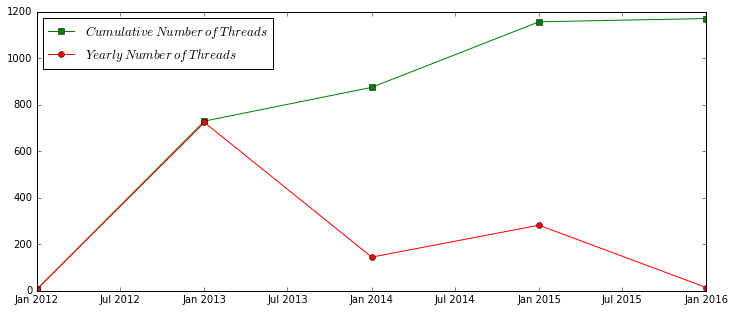

In [50]:
fig = plt.figure(figsize=(12,5))
plt.plot(ds.date, ds.year, 'g-s', label = '$Cumulative\: Number\:of\: Threads$')
plt.plot(dd.date, dd.year, 'r-o', label = '$Yearly\:Number\:of\:Threads$')
#plt.yscale('log')
plt.legend(loc=2,numpoints=1,fontsize=13)
plt.show()

In [57]:
dt.reply[:193]

0      供暖季开始一周后，东　　北多地迎来持续的六级严重污染天气。11月8日，沈阳PM2.5浓度爆表...
1                                                       
2                                       加强空气治理，保证人民身体健康！
3      @静静的莲花  1楼  2015-11-09 14:18:00　　　　———————————...
4                                         要PM2.5 还是要供暖？哎
5                                             好吓人 。。。。。。
6                                                饺子王很亮。。
7                                               吓人啊！吓人哪!
8                               印象中的东北不是山清水秀的吗，怎么也污染这么严重
9                                                    好可怕
10                                            东北饺子王！好犀利！
11     @老婆叫我来巡山 2015-11-09 15:07:00　　要PM2.5 还是要供暖？哎　　...
12                                说真的，东北太冷不适合居住，还是南方好。。。
13                天空飘来五个字，　　人间仙境死的快。　　莫言雾霾己爆表，　　东北人民嗨起来。
14                                               烧秸秆造成的？
15                                             大神都不装分析帝了
16     @老婆叫我来巡山    2015-11-09 15:07:00　　要PM2.5 还是要供暖？...
17     @又混了一天 2015-11-09 15:55:

## 2.4 找到回帖中的重复者

In [71]:
import re
for k, tweet in enumerate(dt.reply[:192]):
    tweet = tweet.decode('utf8')
    RTpattern = r'''@(\w+)\s'''
    for person in re.findall(RTpattern, tweet, re.UNICODE):
        print k,'\t',dt.author_name[k],'\t', person,'\t\t', tweet[:30]

3 	静静的莲花 	静静的莲花 		@静静的莲花  1楼  2015-11-09 14:18:0
11 	z_ygg 	老婆叫我来巡山 		@老婆叫我来巡山 2015-11-09 15:07:00　　
16 	新昌仁慧1 	老婆叫我来巡山 		@老婆叫我来巡山    2015-11-09 15:07:0
16 	新昌仁慧1 	z_ygg 		@老婆叫我来巡山    2015-11-09 15:07:0
17 	北十字 	又混了一天 		@又混了一天 2015-11-09 15:55:32　　烧秸
18 	北十字 	老婆叫我来巡山 		@老婆叫我来巡山    2015-11-09 15:07:0
18 	北十字 	z_ygg 		@老婆叫我来巡山    2015-11-09 15:07:0
18 	北十字 	新昌仁慧1 		@老婆叫我来巡山    2015-11-09 15:07:0
21 	杂谈一帮闲 	老婆叫我来巡山 		@老婆叫我来巡山    2015-11-09 15:07:0
21 	杂谈一帮闲 	z_ygg 		@老婆叫我来巡山    2015-11-09 15:07:0
21 	杂谈一帮闲 	新昌仁慧1 		@老婆叫我来巡山    2015-11-09 15:07:0
21 	杂谈一帮闲 	北十字 		@老婆叫我来巡山    2015-11-09 15:07:0
26 	大力昆撒 	静静的莲花 		@静静的莲花 1楼 2015-11-09 14:18　　哈尔
31 	两江相汇 	xinmo1207 		@xinmo1207 2015-11-09 16:44:28
32 	盗号是孙子 	z_ygg 		@z_ygg 11楼 2015-11-09 15:37　　@
32 	盗号是孙子 	老婆叫我来巡山 		@z_ygg 11楼 2015-11-09 15:37　　@
39 	静静的莲花 	z_ygg 		@z_ygg  11楼  2015-11-09 15:37:
39 	静静的莲花 	老婆叫我来巡山 		@z_ygg  11楼  2015-11-09 15:37:
40 	静静的莲花 	又混了一天 		@又混了一天  14楼  2015-11-09 15:55:
47 	每天上班不休息 	静静的莲花 		@静静的莲花 41楼 2015-11-09 18:3

In [90]:
link_author_dict = {} 
for i in range(len(df)):
    link_author_dict[df.link[i]] =df.author[i]
    with open('/Users/dingcong/Desktop/pm2.5/tianyapm_network.txt', 'a') as f:
        f.write(str(link_author_dict)+'\n')

In [85]:
print link_author_dict

{'/post-free-3766386-1.shtml': '\xe5\xbf\x83\xe5\x89\x91\xe5\x90\x88\xe4\xb8\x80', '/post-free-3168273-1.shtml': '\xe6\x9f\xb3\xe6\x9a\x97\xe8\x8a\xb1\xe6\x98\x8e\xe6\xb0\xb4\xe6\xb8\x85', '/post-free-4082245-1.shtml': 'ren20041960', '/post-free-3867623-1.shtml': '\xe6\x9c\xb5\xe6\x8b\x89\xe7\x9a\x84\xe5\xa4\xa9\xe4\xbd\xbf', '/post-free-3825633-1.shtml': '\xe6\xb2\xa1\xe6\x9c\x89\xe6\x95\x91\xe4\xb8\x96\xe4\xb8\xbb007', '/post-free-4544189-1.shtml': 'dapocm', '/post-free-3893433-1.shtml': '\xe7\x94\xb7\xe7\xa7\x91\xe5\x8c\xbb\xe7\x94\x9f\xe4\xbb\xbb\xe4\xb8\xbb\xe4\xbb\xbb', '/post-free-3867596-1.shtml': '\xe4\xbe\x83\xe5\x90\xa7\xe4\xb8\xbb\xe4\xba\xba', '/post-free-3059644-1.shtml': '\xe6\xb7\xb1\xe7\xa9\xba\xe5\xb9\xbb\xe5\xbd\xb1', '/post-free-3026738-1.shtml': '\xe5\xad\xa3\xe6\x9c\xab\xe5\xaf\x82\xe5\xaf\x9e110', '/post-free-5341013-1.shtml': 'malilian2015', '/post-free-3158854-1.shtml': 'htgglp', '/post-free-4899887-1.shtml': '\xe4\xb8\x8a\xe6\xb5\xb7\xe7\xbb\xb4\xe8\x88\x8d\xe

In [72]:
graph = []
for k, tweet in enumerate(dt.reply):
    tweet = tweet.decode('utf8')
    url = dt.link[k]
    RTpattern = r'''@(\w+)\s'''
    persons = re.findall(RTpattern, tweet, re.UNICODE)
    if persons:
        for person in persons: #person是被@的人
            graph.append([dt.author_name[k].decode('utf8'), person])
    else:
        graph.append( [dt.author_name[k].decode('utf8'), link_author_dict[url].decode('utf8')]  )

In [73]:
len(graph) 

1406

In [86]:
dt.shape

(1171, 10)

In [74]:

for x, y in graph[:1406]:
    print x, y

静静的莲花 静静的莲花
静静的莲花 静静的莲花
静静的莲花 静静的莲花
静静的莲花 静静的莲花
老婆叫我来巡山 静静的莲花
临安小股民 静静的莲花
icewindx2015 静静的莲花
草苞 静静的莲花
jqg00 静静的莲花
小白兔vs小灰兔 静静的莲花
luckychocobear 静静的莲花
z_ygg 老婆叫我来巡山
穷矮矬纯屌丝 静静的莲花
北方在北方的北方 静静的莲花
又混了一天 静静的莲花
sayso2012 静静的莲花
新昌仁慧1 老婆叫我来巡山
新昌仁慧1 z_ygg
北十字 又混了一天
北十字 老婆叫我来巡山
北十字 z_ygg
北十字 新昌仁慧1
暴走小熊猫2015 静静的莲花
薄荷sheep 静静的莲花
杂谈一帮闲 老婆叫我来巡山
杂谈一帮闲 z_ygg
杂谈一帮闲 新昌仁慧1
杂谈一帮闲 北十字
紫红大辣椒88 静静的莲花
张智霖冧爆你 静静的莲花
腔的热血悲愤的心 静静的莲花
xinmo1207 静静的莲花
大力昆撒 静静的莲花
lichao200304 静静的莲花
marx的预言 静静的莲花
lovestar 静静的莲花
拉拉太阳 静静的莲花
两江相汇 xinmo1207
盗号是孙子 z_ygg
盗号是孙子 老婆叫我来巡山
yzoy1991 静静的莲花
满洲春天 静静的莲花
yzoy1991 静静的莲花
作者麦客 静静的莲花
工作记事 静静的莲花
waywaynoway 静静的莲花
静静的莲花 z_ygg
静静的莲花 老婆叫我来巡山
静静的莲花 又混了一天
继续封号啊2 静静的莲花
静静的莲花 静静的莲花
kohaku1983 静静的莲花
大大大大大大大可 静静的莲花
wukeshiwo1 静静的莲花
每天上班不休息 静静的莲花
每天上班不休息 静静的莲花
每天上班不休息 z_ygg
每天上班不休息 老婆叫我来巡山
每天上班不休息 en20081
走过710 静静的莲花
亡命鱼2011 静静的莲花
秦六杆 静静的莲花
原不动 静静的莲花
523601669q 静静的莲花
退伍炮兵2010 静静的莲花
静静的莲花 退伍炮兵2010
愿望花满大地 静静的莲花
马甲有性别吗 静静的莲花
燕山野叟 静静的莲花
smallantfly 静静的莲花
daicy109 z_ygg
daicy109 老婆叫我来巡山
daicy109 静静的莲花
sma

# 3. 构建回帖网络

In [70]:
import networkx as nx

In [75]:
G = nx.DiGraph()
for x,y in graph:
    if x != y:
        G.add_edge(x,y)

In [76]:

nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 608\nNumber of edges: 822\nAverage in degree:   1.3520\nAverage out degree:   1.3520'

In [77]:
GU=G.to_undirected(reciprocal=True) 
graphs = list(nx.connected_component_subgraphs(GU))

## 3.1 找到网络关系数最多的节点，显示其网络

In [78]:
import numpy as np
size = []
for i in graphs:
    size.append(len(i.nodes()))
len(size), np.max(size)

(558, 16)

In [79]:
gs = []
for i in graphs:
    if len(i.nodes()) >5:
        gs.append(i)
len(gs)

3

In [80]:
for g in gs:
    print len(g.nodes())

16
8
8


In [81]:
g_max = gs[0]
len(g_max.nodes())

16

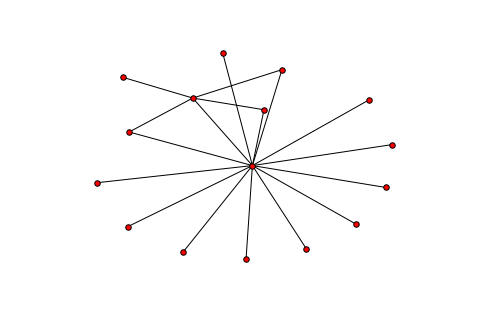

In [82]:
pos = nx.spring_layout(g_max)          
#定义一个布局，此处采用了spectral布局方式，后变还会介绍其它布局方式，注意图形上的区别
nx.draw(g_max,pos,with_labels=False,node_size = 30)  
#绘制规则图的图形，with_labels决定节点是非带标签（编号）,node_size是节点的直径
plt.show()  #显示图形

In [96]:
with open('/Users/dingcong/Desktop/pm2.5/tianyapm_network.csv', 'a') as f:
    for x, y in G.edges():
        f.write(x.encode('utf8') + ',' + y.encode('utf8') + '\n')

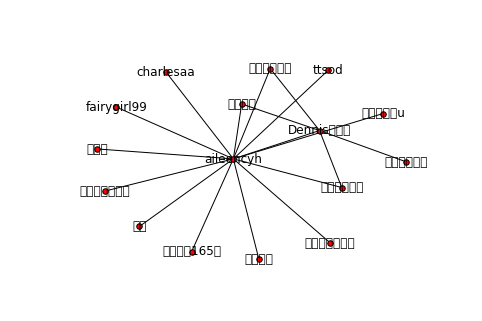

In [100]:
pos = nx.spring_layout(g_max)           
nx.draw(g_max,pos,with_labels=True,node_size = 30)  
plt.show()

## 3.2 显示回帖网络

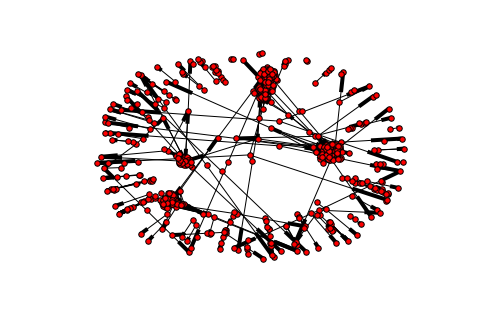

In [87]:
pos = nx.spring_layout(G)          
nx.draw(G,pos,with_labels=False,node_size = 30)  
plt.show()

***
## 结论
天涯杂谈关于PM2.5的回帖网络中，其中心位置，形成了4个小的回帖网络。且最上方的回帖网络十分集中，周围的连接关系较少，即其讨论最为封闭化。左下角的两个小网络，周围的连接关系较为分散，即讨论相对不那么封闭。